In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#seeds = [10, 26, 31, 34, 44, 47, 67, 76, 86, 89]
#seeds = [7, 8, 12, 19, 30, 41, 43, 68, 71, 84]
seeds = [2, 6, 8, 11, 14, 25, 27, 30, 39, 40, 45, 46, 47, 50, 52, 53, 55, 65, 77, 78, 82, 85, 86, 91, 93]

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[2]]

In [5]:
X_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns

In [6]:
pos_idxs = []
col_above = []

In [7]:
p = np.random.default_rng().permutation(len(X.columns))
print(X.columns[:10])
print(X.columns[p][:10])

Index(['MW', 'AMW', 'Mv', 'Mi', 'nTA', 'RBF', 'nDB', 'nAB', 'nN', 'nHet'], dtype='object')
Index(['F07[C-C]', 'MATS7v', 'X4sol', 'ATSC6m', 'P_VSA_ppp_N', 'Mor17m',
       'PJI3', 'Eta_epsi_5', 'ATSC4v', 'GMTI'],
      dtype='object')


In [8]:
i = 0
for seed in seeds:
    i += 1
    #print('Seed: {}'.format(seed))
    rng = np.random.default_rng(seed=seed)
    for run in range(10):
        #print('Seed: {}, run: {}'.format(seed, run))
        X_scaled['random'] = rng.random(size=len(X_scaled))
        perm = rng.permutation(len(X_scaled.columns))
        X_perm = X_scaled[X_scaled.columns[perm]]
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
        rf.fit(X_perm, y)
        feature_importances_sorted, X_col_sorted = zip(*sorted(zip(rf.feature_importances_, X_perm.columns), reverse=True))
        pos_idxs.append(X_col_sorted.index('random'))
        col_above.append(X_perm.columns[:pos_idxs[-1]])
        #col_above += [col for col in X_scaled.columns[:pos_idxs[-1]]]
    print('{}% done'.format(i*100//len(seeds)))

4% done
8% done
12% done
16% done
20% done
24% done
28% done
32% done
36% done
40% done
44% done
48% done
52% done
56% done
60% done
64% done
68% done
72% done
76% done
80% done
84% done
88% done
92% done
96% done
100% done


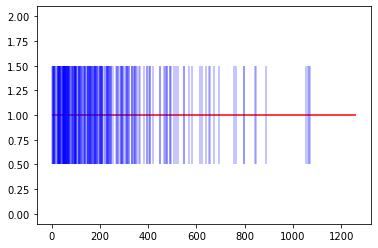

In [9]:
plt.figure()
plt.hlines(1,1, len(X_scaled.columns),colors='r')
plt.eventplot(pos_idxs, orientation='horizontal', colors='b', alpha=0.3)
plt.show()

In [10]:
col_names = [l for lst in col_above for l in lst ]
col_counts = Counter(col_names)

In [11]:
col_counts = {k: v for k, v in sorted(col_counts.items(), key=lambda item: item[1], reverse=True)}
col_counts

{'CATS2D_03_AA': 63,
 'Mor25s': 61,
 'Rperim': 60,
 'Mor23s': 60,
 'TDB04p': 59,
 'R2v+': 59,
 'CATS3D_04_DN': 59,
 'CATS2D_01_LL': 59,
 'F04[C-O]': 58,
 'CATS2D_05_DN': 58,
 'AVS_B(p)': 58,
 'E2m': 58,
 'SpMin3_Bh(m)': 58,
 'VE2_G/D': 57,
 'R2e+': 57,
 'Mor09m': 57,
 'Mor07m': 57,
 'GATS4p': 56,
 'TDB04v': 56,
 'H1v': 56,
 'R4i+': 56,
 'SHED_AP': 56,
 'QZZi': 56,
 'P_VSA_LogP_5': 55,
 'G1m': 55,
 'R1u': 55,
 'ATSC1i': 55,
 'Eig08_AEA(bo)': 55,
 'MW': 55,
 'GATS5i': 55,
 'Mor26p': 55,
 'R5m': 55,
 'Mor15s': 55,
 'CATS3D_04_AA': 54,
 'GATS2p': 54,
 'VE2sign_B(e)': 54,
 'X3': 54,
 'R8e+': 54,
 'DISPe': 54,
 'C-002': 54,
 'X5': 54,
 'HATS5u': 54,
 'Mor08i': 54,
 'Mor16s': 54,
 'MATS2i': 54,
 'X3A': 54,
 'RDF065m': 54,
 'Mor11v': 54,
 'MLOGP': 54,
 'GATS3i': 53,
 'R5i+': 53,
 'MATS3p': 53,
 'nROR': 53,
 'Dp': 53,
 'Mor29v': 53,
 'Eig13_EA(dm)': 53,
 'R8e': 53,
 'PCD': 53,
 'P1v': 53,
 'Mor27e': 53,
 'NdssC': 53,
 'Mor12s': 53,
 'R7s': 53,
 'CATS3D_07_DN': 53,
 'R4p+': 53,
 'Eta_epsi_2': 53

In [12]:
col_counts['random']

39

<AxesSubplot:>

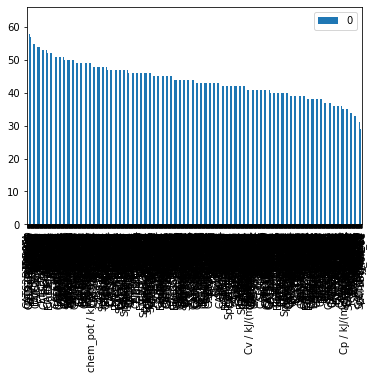

In [13]:
df = pd.DataFrame.from_dict(col_counts, orient='index')
df.plot(kind='bar')

In [14]:
len(col_counts.keys())

1261

In [15]:
selected_features = []
for key in col_counts.keys():
    if col_counts[key] < 100:
        break
    selected_features.append(key)
selected_features

[]